In [25]:
# Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sc
from bokeh import __version__ as bk_version

from sklearn.model_selection import train_test_split
import xgboost as xgb

pd.set_option("display.max_columns", None)

In [2]:
# Import the dataset

df = pd.read_csv("Dataset/freMTPL2freq.csv")

df["freq"] = df["ClaimNb"] / df["Exposure"]
df["LogDensity"] = np.log(df["Density"])

df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,freq,LogDensity
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,0.263964,5.981771
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,4.593915,1.870453
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000,0.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000,4.521789
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000,5.973810
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000,7.413367
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,732.000000,10.203592


In [3]:
# Creating the subset of data

random_subset = df.sample(n=20000)
subset_summary = random_subset.describe()

subset_summary

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,freq,LogDensity
count,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.637880e+06,0.05620,0.522803,6.433650,6.963400,45.393900,59.882650,1794.702800,0.323178,5.990541
std,1.635282e+06,0.24788,0.364627,2.034184,5.588571,14.101794,15.768754,3975.984711,5.834731,1.859956
min,3.000000e+00,0.00000,0.002732,4.000000,0.000000,18.000000,50.000000,2.000000,0.000000,0.693147
25%,1.169264e+06,0.00000,0.160000,5.000000,2.000000,34.000000,50.000000,94.000000,0.000000,4.543295
50%,2.276818e+06,0.00000,0.490000,6.000000,6.000000,44.000000,50.000000,395.000000,0.000000,5.978886
75%,4.053104e+06,0.00000,0.980000,7.000000,11.000000,55.000000,64.000000,1629.000000,0.000000,7.395722
max,6.114320e+06,6.00000,1.410000,15.000000,99.000000,99.000000,187.000000,27000.000000,366.000000,10.203592


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plotBarCharts(data, x, ylimitFREQ, n=10):
    sns.set_style("whitegrid")
    sns.set_palette("viridis")

    # Get all unique categories from data (ensures every possible category is present)
    categories = sorted(data[x].unique().tolist())
    cat2idx = {cat: i for i, cat in enumerate(categories)}
    idx2cat = {i: cat for cat, i in cat2idx.items()}

    # Group data for exposure and frequency
    exposure_df = data.groupby(x, as_index=False).agg({'Exposure': 'sum'})
    freq_df     = data.groupby(x, as_index=False).agg({'freq': 'mean'})

    # Map grouped data to all category positions
    exposure_vals = [exposure_df.loc[exposure_df[x] == idx2cat[i], 'Exposure'].values[0] if (exposure_df[x] == idx2cat[i]).any() else 0 for i in range(len(categories))]
    freq_vals     = [freq_df.loc[freq_df[x] == idx2cat[i], 'freq'].values[0] if (freq_df[x] == idx2cat[i]).any() else 0 for i in range(len(categories))]

    xpos = list(range(len(categories)))  # 0 ... N-1

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Exposure Plot
    axs[0].bar(xpos, exposure_vals)
    axs[0].set_xlabel(x, fontsize=12)
    axs[0].set_ylabel('Total Exposure', fontsize=12)
    axs[0].set_title(f"Exposure by {x}", fontsize=16, fontweight='bold')
    axs[0].set_xlim(-0.5, len(categories) - 0.5)  # Include first and last ticks
    axs[0].set_xticks(xpos)
    axs[0].set_xticklabels(categories, rotation=45, fontsize=10)

    # for i, val in enumerate(exposure_vals):
    #     if val > 0:
    #         axs[0].annotate(f'{val:.0f}', (i, val), ha='center', va='bottom', fontsize=10)

    # Frequency Plot
    axs[1].bar(xpos, freq_vals)
    axs[1].set_xlabel(x, fontsize=12)
    axs[1].set_ylabel('Mean Frequency', fontsize=12)
    axs[1].set_title(f"Mean Frequency by {x}", fontsize=16, fontweight='bold')
    axs[1].set_ylim(0, ylimitFREQ)
    axs[1].set_xlim(-0.5, len(categories) - 0.5)
    axs[1].set_xticks(xpos)
    axs[1].set_xticklabels(categories, rotation=45, fontsize=10)

    # for i, val in enumerate(freq_vals):
    #     if val > 0:
    #         axs[1].annotate(f'{val:.2f}', (i, val), ha='center', va='bottom', fontsize=10)

    plt.suptitle('Insurance Data Insights: Exposure & Frequency', fontsize=18, fontweight='bold', color='#444')
    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()


# Data Exploration

### Explore each explanatory variable using subset data

### Keeping Frequency at 2

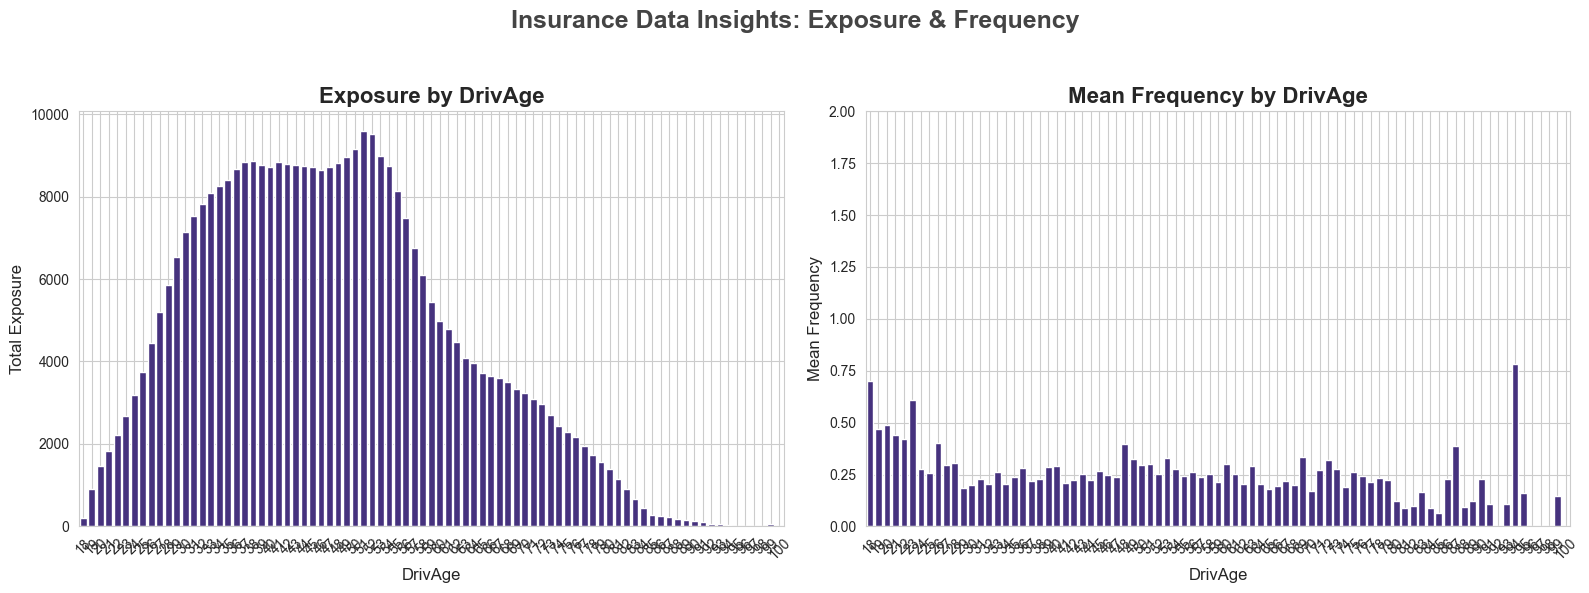

CPU times: total: 938 ms
Wall time: 1.6 s


In [5]:
%%time

plotBarCharts(df, "DrivAge", 2)

In [6]:
# Exposure largely concentrated in age between ~28 to ~58

# Frequency in Most younder and most older ages of driver

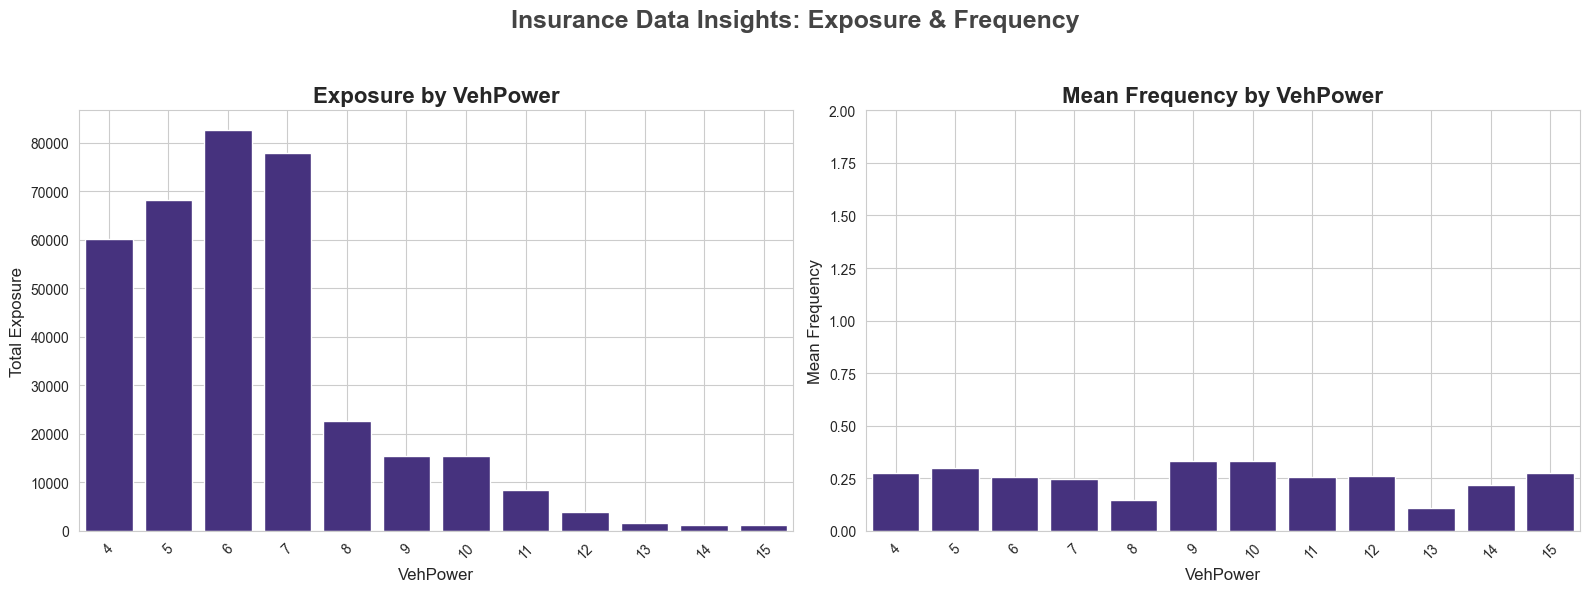

CPU times: total: 375 ms
Wall time: 409 ms


In [7]:
%%time

plotBarCharts(df, "VehPower", 2)

In [8]:
# Vehicle with less power tends to have more Exposure

# Nothing noticable with Frequency in Power of Vehicle

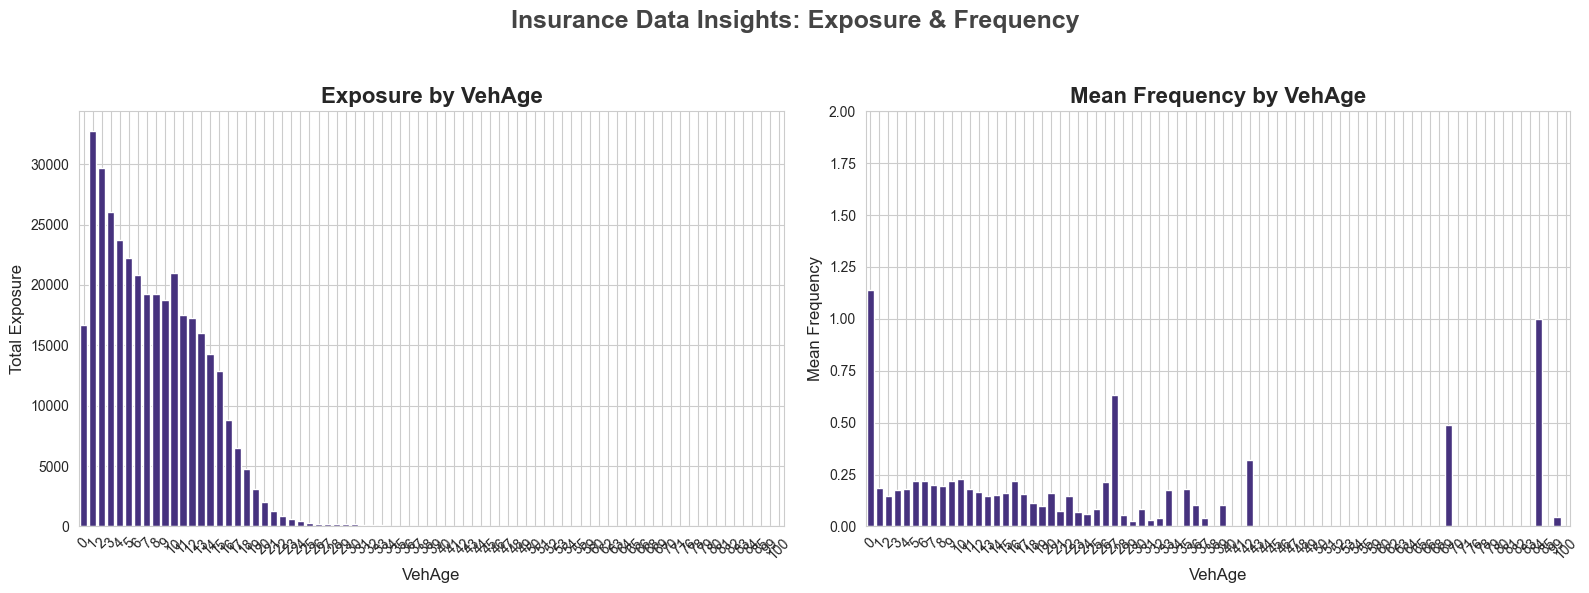

CPU times: total: 1.12 s
Wall time: 1.3 s


In [9]:
%%time

plotBarCharts(df, "VehAge", 2)

In [10]:
# At starting years of Vehicle, it tends to have more Exposure

# At Start 0, and at the end, Frequency is high

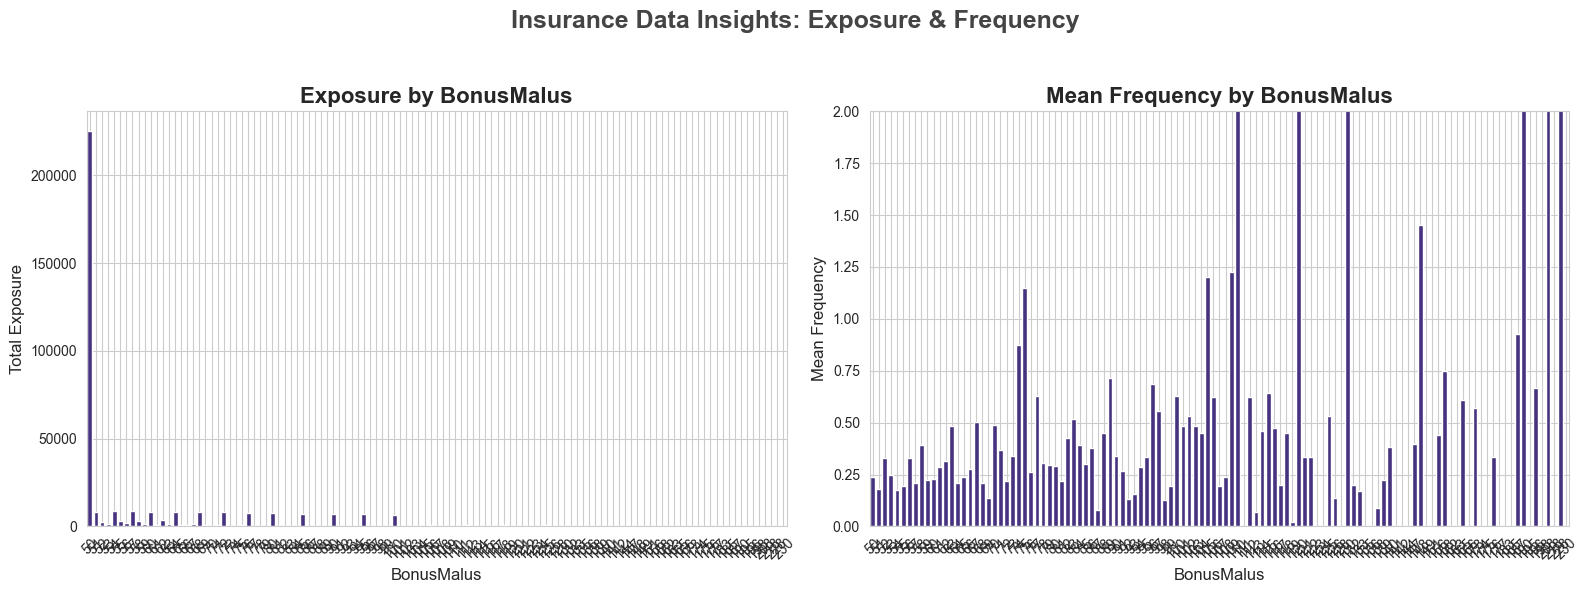

In [11]:
plotBarCharts(df, "BonusMalus", 2)

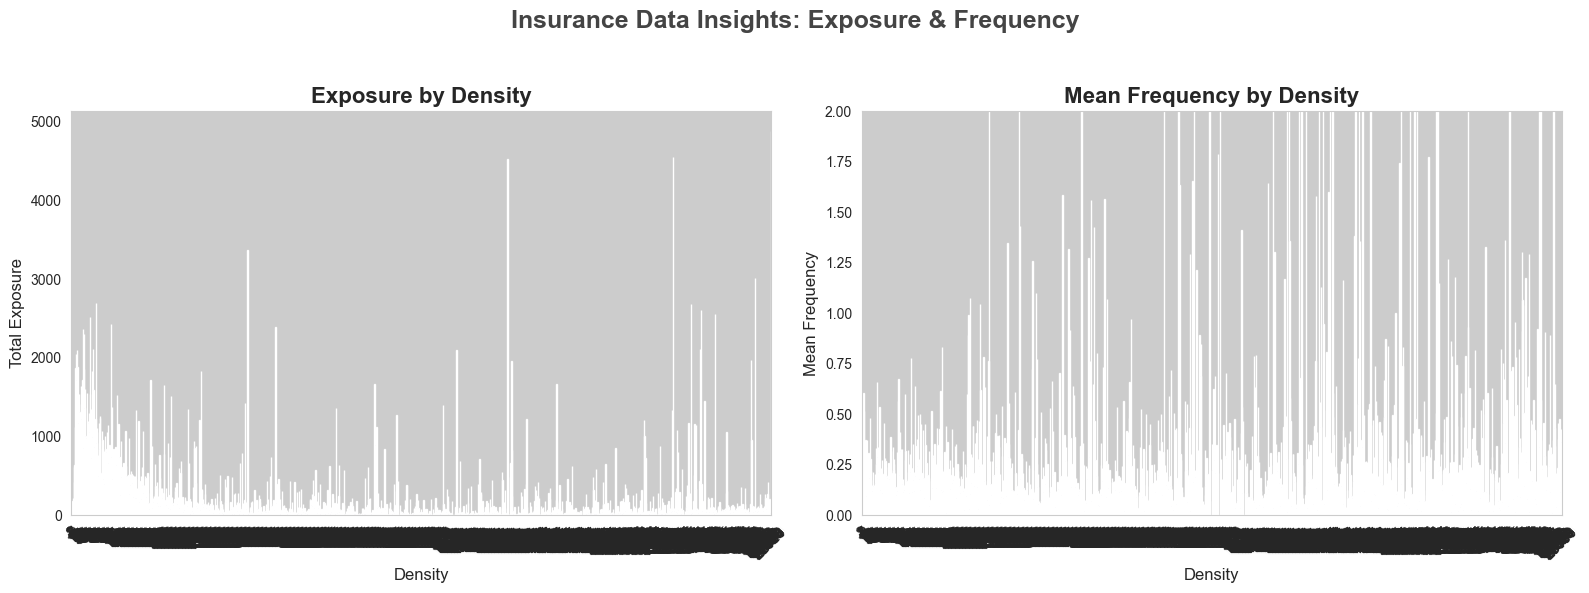

In [12]:
plotBarCharts(df, "Density", 2)

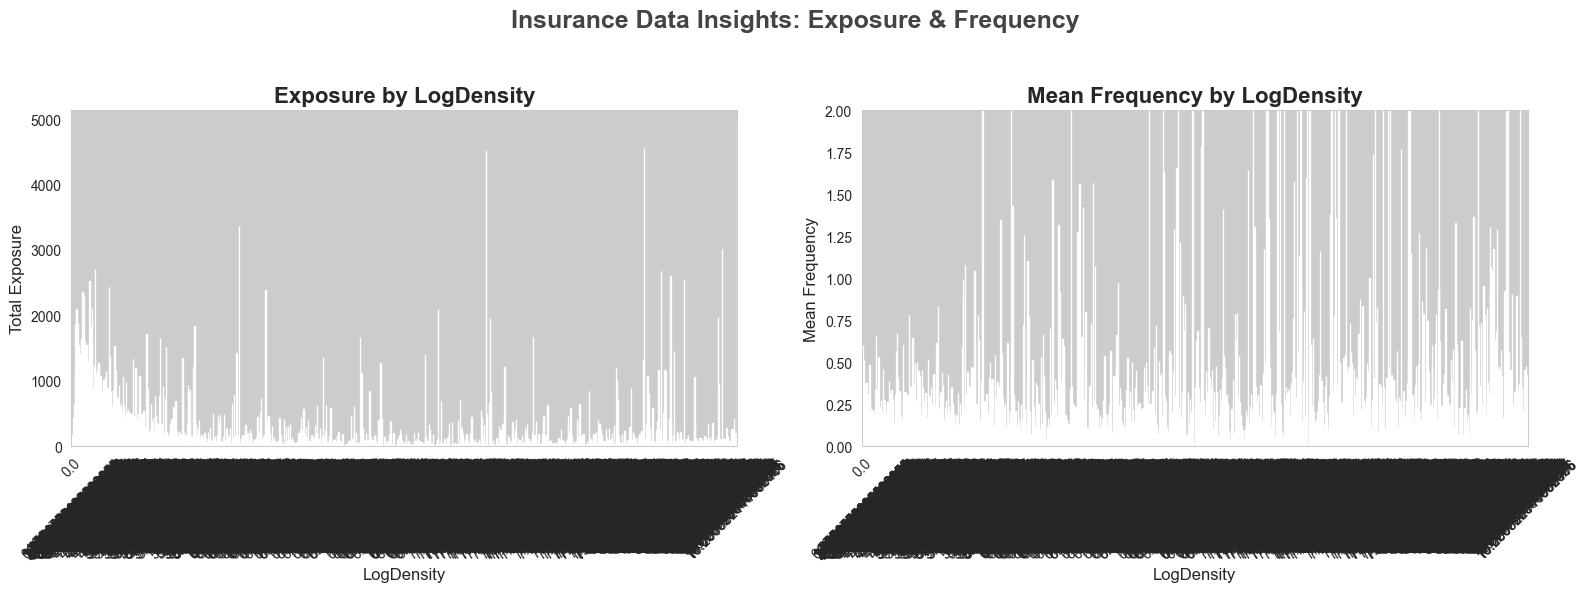

In [13]:
plotBarCharts(df, "LogDensity", 2)

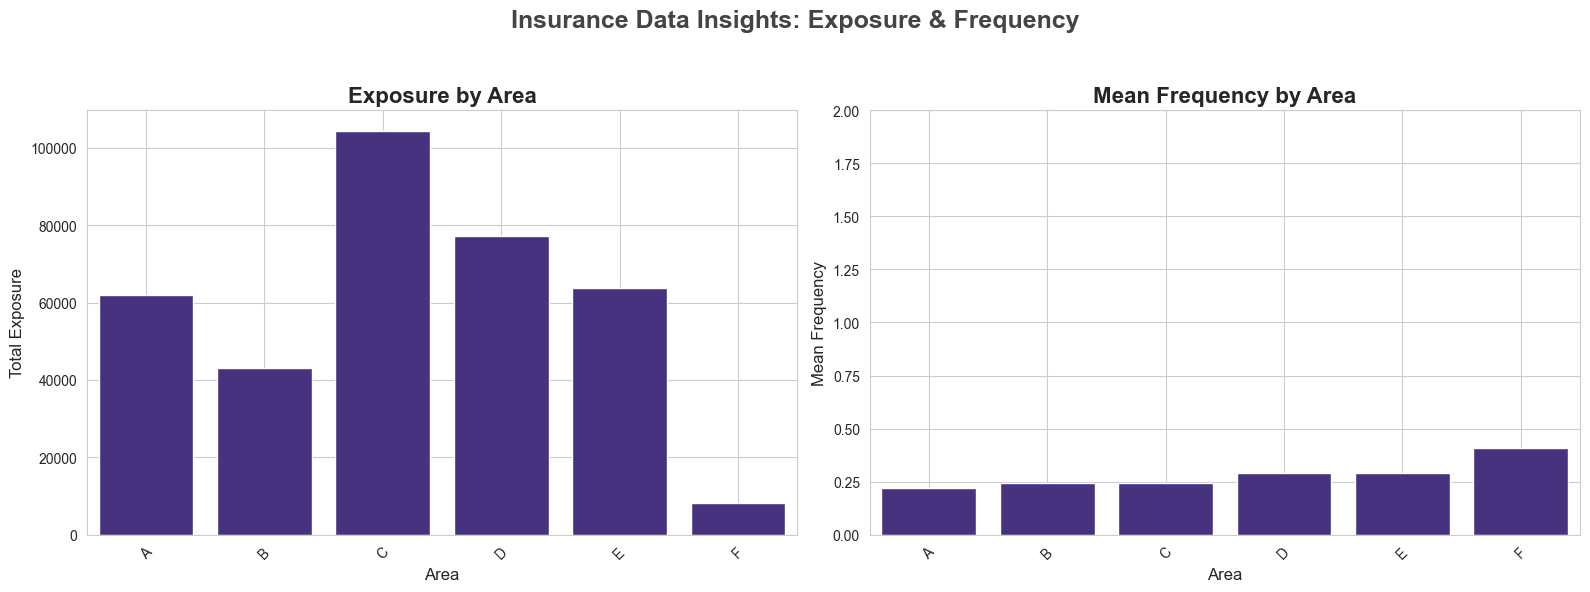

In [14]:
plotBarCharts(df, "Area", 2)

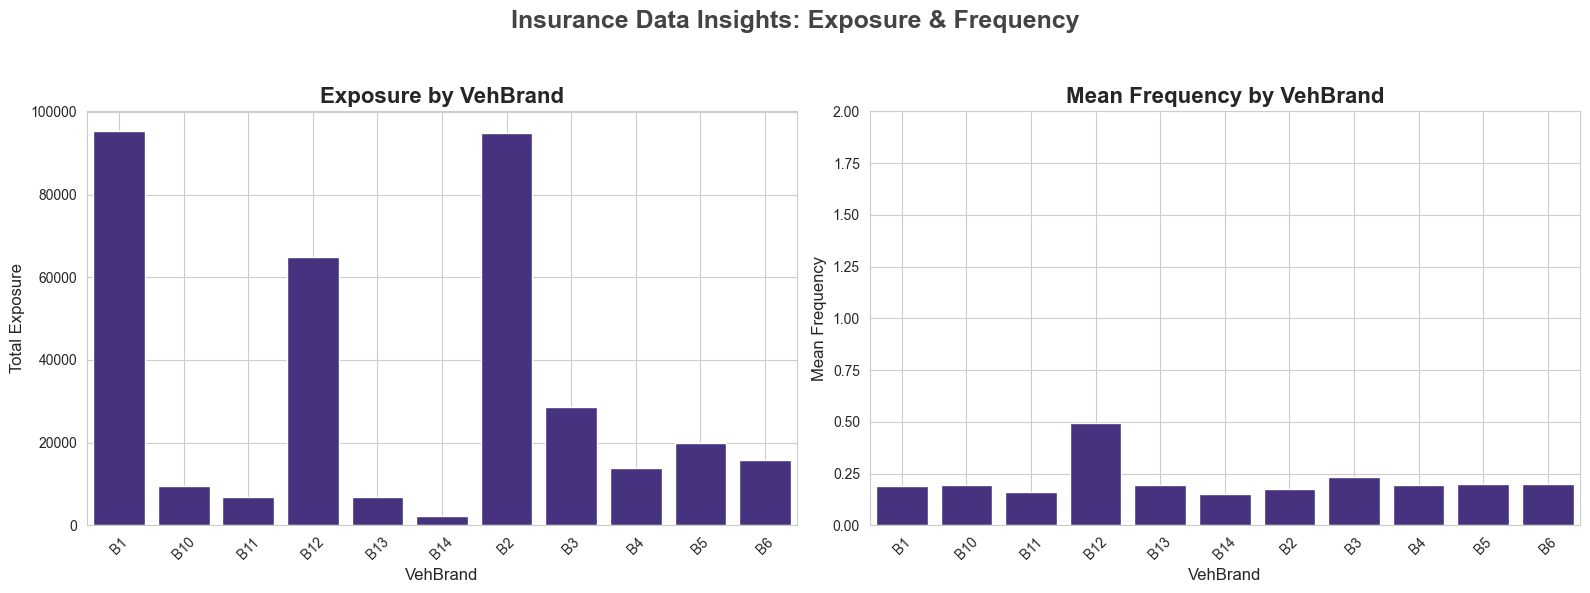

In [15]:
plotBarCharts(df, "VehBrand", 2)

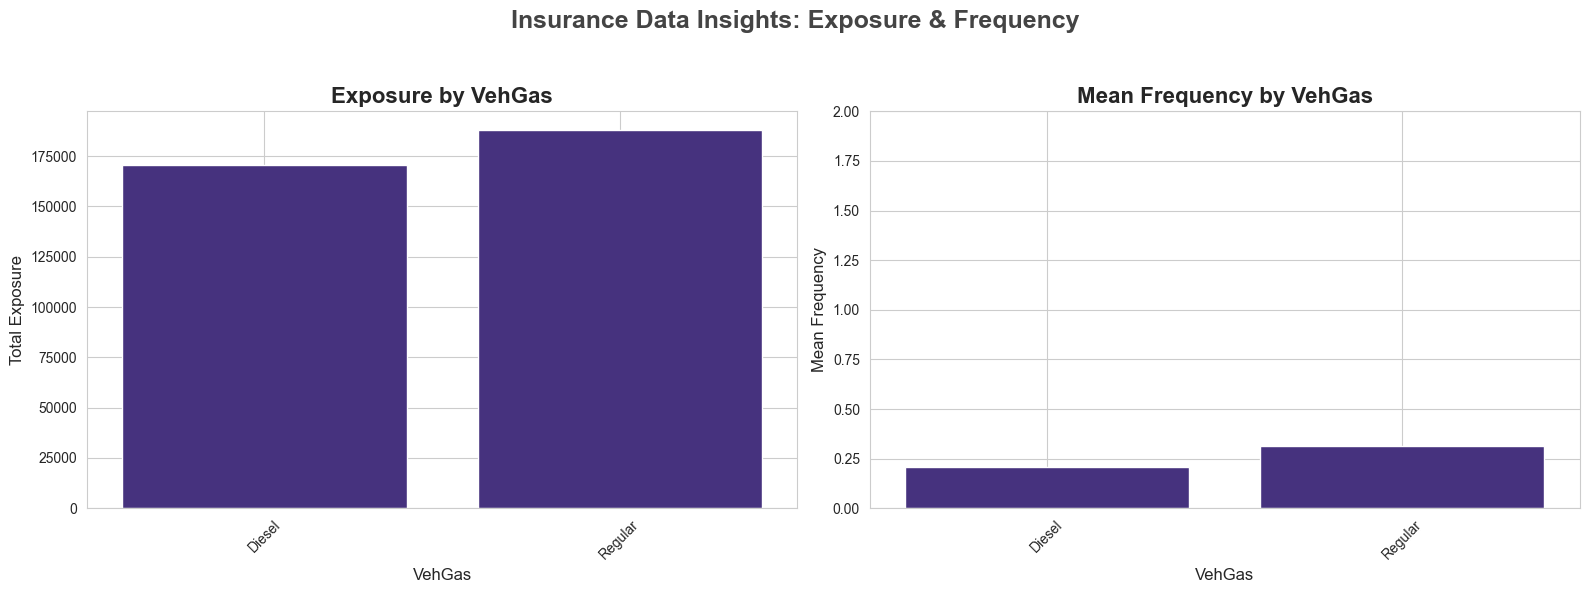

In [16]:
plotBarCharts(df, "VehGas", 2)

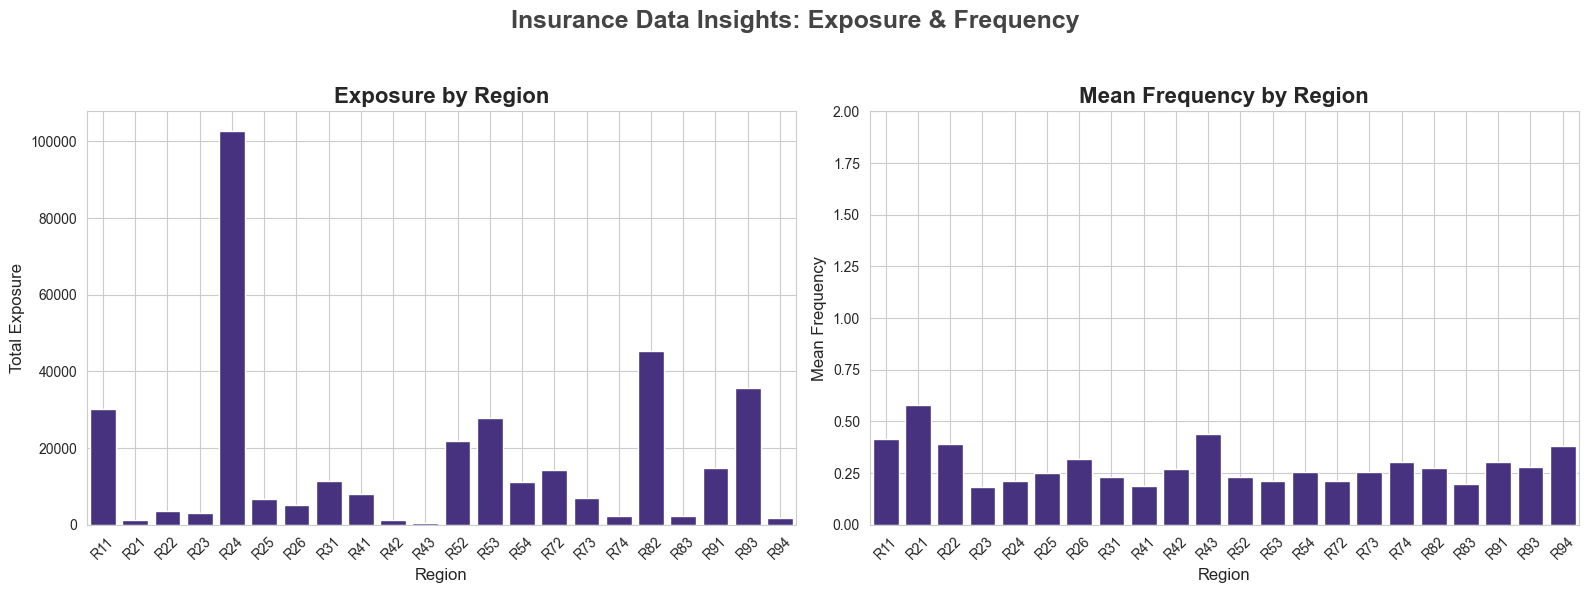

In [17]:
plotBarCharts(df, "Region", 2)

In [18]:
# Modeling

In [19]:
df.isnull().sum()

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
freq          0
LogDensity    0
dtype: int64

In [20]:
# One Hot Encoding for make this dataframe suitable for the XGBoost Model

In [23]:
df_new = pd.get_dummies(df, columns= ["Area", "VehBrand", "VehGas", "Region"], 
                        prefix = ["Area", "VehBrand", "VehGas", "Region"])

print(df_new.describe())

              IDpol        ClaimNb       Exposure       VehPower  \
count  6.780130e+05  678013.000000  678013.000000  678013.000000   
mean   2.621857e+06       0.053247       0.528750       6.454631   
std    1.641783e+06       0.240117       0.364442       2.050906   
min    1.000000e+00       0.000000       0.002732       4.000000   
25%    1.157951e+06       0.000000       0.180000       5.000000   
50%    2.272152e+06       0.000000       0.490000       6.000000   
75%    4.046274e+06       0.000000       0.990000       7.000000   
max    6.114330e+06      16.000000       2.010000      15.000000   

              VehAge        DrivAge     BonusMalus        Density  \
count  678013.000000  678013.000000  678013.000000  678013.000000   
mean        7.044265      45.499122      59.761502    1792.422405   
std         5.666232      14.137444      15.636658    3958.646564   
min         0.000000      18.000000      50.000000       1.000000   
25%         2.000000      34.000000      5

In [24]:
df_new

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,freq,LogDensity,Area_A,Area_B,Area_C,Area_D,Area_E,Area_F,VehBrand_B1,VehBrand_B10,VehBrand_B11,VehBrand_B12,VehBrand_B13,VehBrand_B14,VehBrand_B2,VehBrand_B3,VehBrand_B4,VehBrand_B5,VehBrand_B6,VehGas_Diesel,VehGas_Regular,Region_R11,Region_R21,Region_R22,Region_R23,Region_R24,Region_R25,Region_R26,Region_R31,Region_R41,Region_R42,Region_R43,Region_R52,Region_R53,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94
0,1.0,1,0.10000,5,0,55,50,1217,10.000000,7.104144,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,3.0,1,0.77000,5,0,55,50,1217,1.298701,7.104144,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,5.0,1,0.75000,6,2,52,50,54,1.333333,3.988984,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10.0,1,0.09000,7,0,46,50,76,11.111111,4.330733,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,11.0,1,0.84000,7,0,46,50,76,1.190476,4.330733,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,4,0,54,50,3317,0.000000,8.106816,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
678009,6114327.0,0,0.00274,4,0,41,95,9850,0.000000,9.195227,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
678010,6114328.0,0,0.00274,6,2,45,50,1323,0.000000,7.187657,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
678011,6114329.0,0,0.00274,4,0,60,50,95,0.000000,4.553877,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
# Split Proportion 

split_props = pd.Series(
    {
        "train" : 0.7,
        "validation" : 0.15,
        "holdout" : 0.15
    }
)

df_train, df_not_train = train_test_split(
    df_new, test_size = (1 - split_props["train"]), random_state = 51, shuffle = True 
)

df_validation, df_holdout = train_test_split(
    df_not_train, test_size = (split_props["holdout"] / (1 - split_props["train"])),
    random_state = 13,
    shuffle = True
)


y_train = df_train.filter(["ClaimNb"])

x_train = df_train.drop(columns = ["ClaimNb", "IDpol", "freq", "Exposure"])
x_train_weight = df_train.filter(["Exposure"])

train_dmatrix = xgb.DMatrix(data = x_train, label = y_train, weight = x_train_weight)

y_valid = df_validation.filter(["ClaimNb"])

x_valid = df_validation.drop(columns = ["ClaimNb", "IDpol", "freq", "Exposure"])

x_valid_weight = df_validation.filter(["Exposure"])

valid_dmatrix = xgb.DMatrix(data = x_valid,
                            label = y_valid, 
                            weight = x_valid_weight)

print(df_validation.describe)
print(x_valid.describe)

<bound method NDFrame.describe of             IDpol  ClaimNb  Exposure  VehPower  VehAge  DrivAge  BonusMalus  \
305186  2216996.0        0      0.08         9       1       44          50   
338120  2271266.0        0      0.83         8       3       47          50   
648798  6033648.0        0      0.20         8       3       36          55   
50825    103221.0        0      0.18         5       2       23         106   
68321    145019.0        0      1.00         8      11       63          50   
...           ...      ...       ...       ...     ...      ...         ...   
484114  3250034.0        0      0.08         5      19       36         100   
560255  4151433.0        0      1.00         6       9       29          90   
650383  6041046.0        0      0.74         5       3       56          50   
340733  2273879.0        0      0.08         6       3       55          55   
247388  2097336.0        0      1.00        10       6       38          56   

        Density  